# Introducing Principal Component Analysis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()

(200, 2)


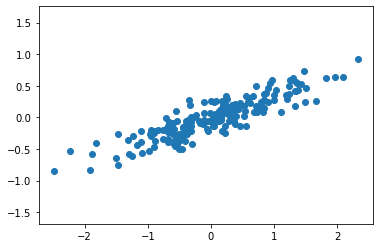

In [2]:
rng = np.random.RandomState(1)
#X = np.dot(rng.rand(5, 5), rng.rand(5, 200)).T
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
print(np.shape(X))

(-2.745703697329288,
 2.9153567650791925,
 -0.9326181575178751,
 1.0044138302291827)

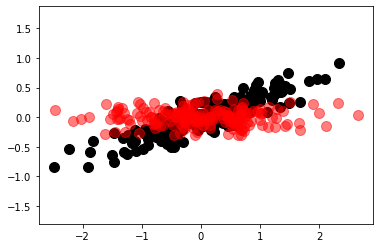

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

#originalni podaci
plt.scatter(X[:, 0], X[:, 1], color='black', s=100, alpha=1)

#transformirani podaci - PCA 
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='red', s=100, alpha=0.5)

plt.axis('equal')

(-2.745703697329289,
 2.9153567650791934,
 -0.9326181575178755,
 1.0044138302291832)

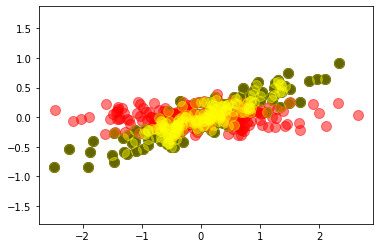

In [16]:
#originalni podaci
plt.scatter(X[:, 0], X[:, 1], color='black', s=100, alpha=1)

#transformirani podaci - podaci u novom koordinatnom sistemu (koordinatni sistem PCA komponenata)
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='red', s=100, alpha=0.5)

#povratak na originalne podatke, ali na osnovu transformiranih podataka
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_new[:, 0], X_new[:, 1], color='yellow', s=100, alpha=0.4)

plt.axis('equal')

In [17]:
#Matrica kovarijansi
pca.get_covariance()

array([[0.68217761, 0.23093475],
       [0.23093475, 0.09883179]])

In [18]:
#Svojstveni vektori
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [19]:
print('Objašnjena varijansa (apsolutne vrijednosti)')
print(pca.explained_variance_)
print('\nObjašnjena varijansa (procentualne vrijednosti)')
print(pca.explained_variance_ratio_)

Objašnjena varijansa (apsolutne vrijednosti)
[0.7625315 0.0184779]

Objašnjena varijansa (procentualne vrijednosti)
[0.97634101 0.02365899]


length= 0.7625315008826112
vector= [-0.94446029 -0.32862557]
v= [-2.47419458 -0.86089761]
center point = [ 0.03351168 -0.00408072]
end_point= [-2.4406829  -0.86497833]
-----------------------------------------------------
length= 0.018477895513562565
vector= [-0.32862557  0.94446029]
v= [-0.1340136   0.38515116]
center point = [ 0.03351168 -0.00408072]
end_point= [-0.10050192  0.38107044]
-----------------------------------------------------


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

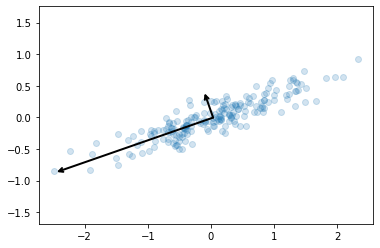

In [22]:
def draw_vector(start_point, end_point, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', end_point, start_point, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    print('length=',length)
    print('vector=',vector)
    v = vector * 3 * np.sqrt(length)
    print('v=',v)
    print('center point =',pca.mean_)
    end_point=pca.mean_ + v
    print('end_point=', end_point)
    print('-----------------------------------------------------')
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')

# PCA as dimensionality reduction

In [11]:
pca = PCA(n_components=1)
pca.fit(X)

print("Objašnjena varijansa (procentualne vrijednosti)")
print(pca.explained_variance_ratio_)

Objašnjena varijansa (procentualne vrijednosti)
[0.97634101]


(200, 1)


(-2.7457036973292883,
 2.9153567650791934,
 -0.9672765706389318,
 1.006064230853995)

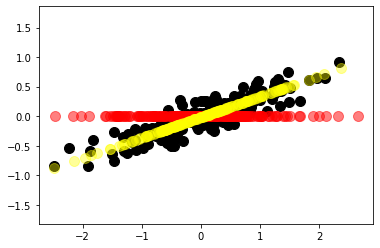

In [12]:
#originalni podaci
plt.scatter(X[:, 0], X[:, 1], color='black', s=100, alpha=1)

#transformirani podaci - podaci u novom koordinatnom sistemu (koordinatni sistem PCA komponenata)
X_pca = pca.transform(X)
print(X_pca.shape)
y_pca=np.zeros(X_pca.shape)
plt.scatter(X_pca[:, 0],y_pca, color='red', s=100, alpha=0.5)

#povratak na originalne podatke, ali na osnovu transformiranih podataka
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_new[:, 0], X_new[:, 1], color='yellow', s=100, alpha=0.4)

plt.axis('equal')
